# Exploratory analysis notebook for Dandiset 001335

**Generated automatically by AI (dandi-notebook-gen). This notebook has not been fully verified, so please use caution when interpreting any of its content or results.**

---

## Dataset overview

**Name:** Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation

**Contributors:** Mohapatra, Manish; Halchenko, Yaroslav

**Description:** Head-fixed wild type mice were presented with various odor sequences, while neural activity was recorded in hippocampus using Neuropixels probes.

**Citation:**
Mohapatra, Manish; Halchenko, Yaroslav (2025) *Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation* (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001335/draft

**License:** CC-BY-4.0

---

## Session metadata

```
Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Experimenter(s): ('Mohapatra, Manish',)
Experiment description: Head-fixed mouse presented with odor sequences
Institution: Dartmouth College
Lab: vandermeerlab
Subject ID: M541, Species: Mus musculus, Sex: M, Age: P8W/, Description: Headbarr-ed mouse with craniotomies over dCA1
```

---

## Experimental structure:
Blocks:
- Block 1: start=616s, duration=~1528s
- Block 2: start=2712s, duration=~1531s
- Block 3: start=4859s, duration=~1323s

Each odor (A–F) presented in 101 trials, lasting ~2 s each, spread across blocks.

---

## Required packages
- dandi
- lindi
- pynwb
- matplotlib
- numpy

## List all Dandiset assets via DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())
for a in assets:
    print(a.path)

sub-M541/sub-M541_ecephys.nwb


## Load the NWB file using recommended approach via lindi+pynwb
The file is streamed via JSON proxy, avoiding large downloads.

In [2]:
import lindi
import pynwb

nwb_url = "https://lindi.neurosift.org/dandi/dandisets/001335/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_url)
io = pynwb.NWBHDF5IO(file=f, mode='r')
nwb = io.read()

## Explore trial/event intervals
Load odor and block intervals and print basic info.

In [3]:
import numpy as np

blocks = ["Block 1", "Block 2", "Block 3"]
for b in blocks:
    tbl = nwb.intervals[b]
    starts = tbl["start_time"][:]
    stops = tbl["stop_time"][:]
    duration = stops - starts
    print(f"{b}: start={starts}, duration={duration}")

odors = ["Odor A ON", "Odor B ON", "Odor C ON", "Odor D ON", "Odor E ON", "Odor F ON"]
for o in odors:
    tbl = nwb.intervals[o]
    starts = tbl["start_time"][:]
    stops = tbl["stop_time"][:]
    duration = stops - starts
    print(f"{o}: {len(starts)} trials, mean duration={np.mean(duration):.3f}s, first start={starts[0]:.3f}s")

Block 1: start=[616.], duration=[1528.]
Block 2: start=[2712.], duration=[1531.]
Block 3: start=[4859.], duration=[1323.]
Odor A ON: 101 trials, mean duration=2.001s, first start=645.080s
Odor B ON: 101 trials, mean duration=2.000s, first start=627.418s
Odor C ON: 101 trials, mean duration=2.001s, first start=621.837s
Odor D ON: 101 trials, mean duration=2.000s, first start=2717.422s
Odor E ON: 101 trials, mean duration=2.001s, first start=2724.063s
Odor F ON: 101 trials, mean duration=2.000s, first start=2729.775s


## Accessing LFP data
The LFP data has shape approximately 15 million samples x 64 channels, sampled at 2500 Hz. Here, we extract and visualize a 2-second snippet from 5 example electrodes.

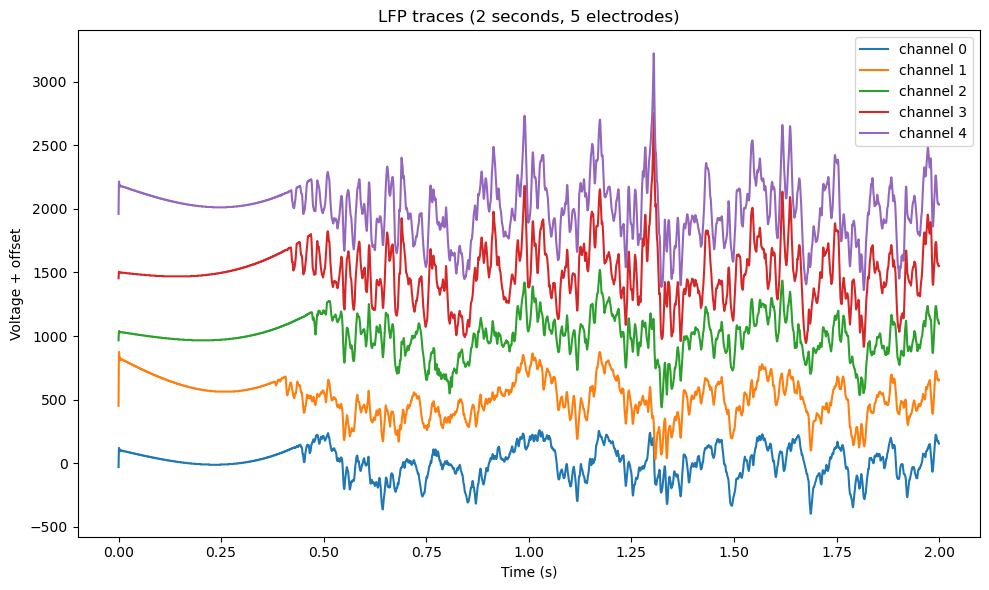

In [4]:
import matplotlib.pyplot as plt

LFP = nwb.processing["ecephys"]["LFP"]
rate = LFP.rate  # sampling rate
data = LFP.data

segment_duration_sec = 2
segment_samples = int(segment_duration_sec * rate)
start_idx = 0

channels_to_plot = np.arange(5)
snippet = data[start_idx:start_idx+segment_samples, channels_to_plot]

time = np.arange(segment_samples) / rate

plt.figure(figsize=(10, 6))
offset = 0
for i, ch in enumerate(channels_to_plot):
    plt.plot(time, snippet[:, i] + offset, label=f'channel {ch}')
    offset += 500  # vertical offset for clarity

plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset')
plt.legend()
plt.title('LFP traces (2 seconds, 5 electrodes)')
plt.tight_layout()
plt.show()

![LFP snippet](tmp_scripts/lfp_snippet.png)

*Figure: Example 2-second LFP snippet from 5 electrodes showing clean neural signals.*

## Accessing units (spike data)
The file contains 283 sorted units. Here's a simple raster plot showing spike times of 3 example units over the first 10 seconds.

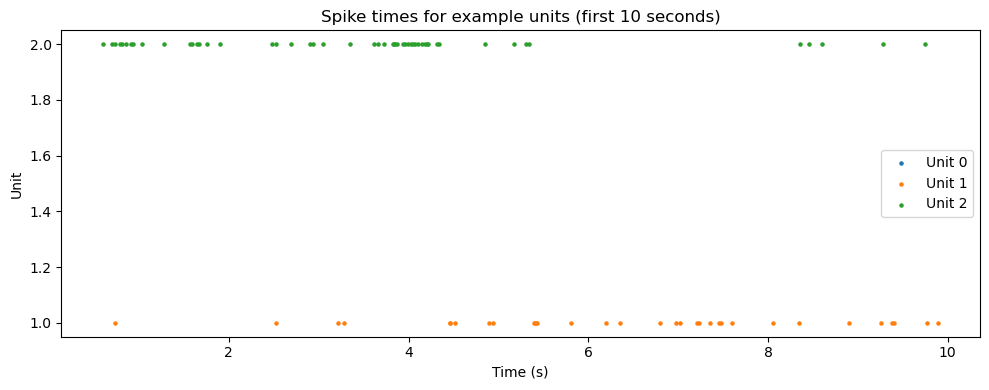

In [5]:
units = nwb.units
unit_ids = units['id'].data[:]
example_unit_idxs = np.arange(3)
time_window = [0, 10]  # seconds

plt.figure(figsize=(10, 4))
for idx, unit_idx in enumerate(example_unit_idxs):
    stimes = units['spike_times'][unit_idx]
    stimes_in_window = stimes[(stimes >= time_window[0]) & (stimes <= time_window[1])]
    plt.scatter(stimes_in_window, idx * np.ones_like(stimes_in_window), s=5, label=f'Unit {unit_ids[unit_idx]}')

plt.xlabel('Time (s)')
plt.ylabel('Unit')
plt.title('Spike times for example units (first 10 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

![Spike raster](tmp_scripts/example_units_raster.png)

*Figure: Example spike rasters over 10 seconds for 3 units, showing heterogeneous spiking patterns.*

## Summary and suggestions

This notebook demonstrates:
- How to connect to the DANDI archive and list assets
- How to load an NWB file remotely using lindi+pynwb
- How to access metadata, event intervals, LFP, and spike data
- How to plot basic LFP and spike raster visualizations

Potential next steps for analysis:
- Align spikes or LFP features to odor stimulus presentations
- Compute average evoked responses across odors
- Quantify firing rate modulations
- Perform information-theoretic or decoding analyses
- Visualize data across all blocks/conditions

Be aware that this notebook was auto-generated and performs minimal quality control or statistical testing. For rigorous insights, further in-depth analysis and validation are essential.